In [14]:
%matplotlib inline

#Add Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import statistics as sts
import numpy as np

In [2]:
# Load CSV Files
city_data_load = os.path.join("resources", "city_data.csv")
ride_data_load = os.path.join("resources", "ride_data.csv")

In [3]:
city_data_df = pd.read_csv(city_data_load)
ride_data_df = pd.read_csv(ride_data_load)

In [4]:
#merge both dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [61]:
#create dataframes for city types
urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
#get count of rides per city 
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [7]:
#get average fare for rides per city 
urban_ride_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_ride_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_ride_fare = rural_df.groupby(["city"]).mean()["fare"]


In [19]:
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

In [15]:
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is 22.86.


In [21]:
# Get the driver count data from the urban cities.
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

print(urban_drivers.describe())
print(suburban_drivers.describe())
print(rural_drivers.describe())


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

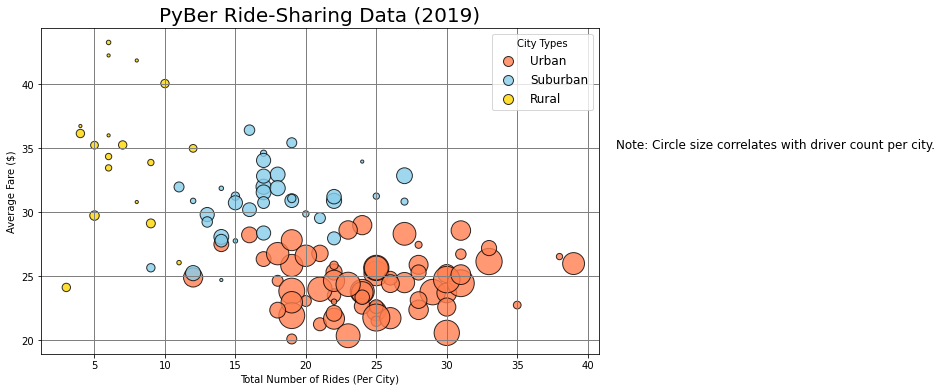

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(urban_ride_count, 
           urban_ride_fare, 
           s=10*(urban_driver_count), 
           color="coral", 
           alpha =0.8, 
           label="Urban", 
           edgecolor="black")
ax.scatter(suburban_ride_count, 
           suburban_ride_fare, 
           s=10*suburban_driver_count, 
           color="skyblue", 
           alpha =0.8, 
           label="Suburban",
           edgecolor="black")
ax.scatter(rural_ride_count, 
           rural_ride_fare, 
           s=10*rural_driver_count, 
           color="gold", 
           alpha =0.8, 
           label="Rural", 
           edgecolor="black")

ax.grid(color="grey", linewidth="1")
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

lgd = ax.legend(title=("City Types"), fontsize=12)

for legend_handle in lgd.legendHandles:
    legend_handle.set_sizes([100])

ax.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show

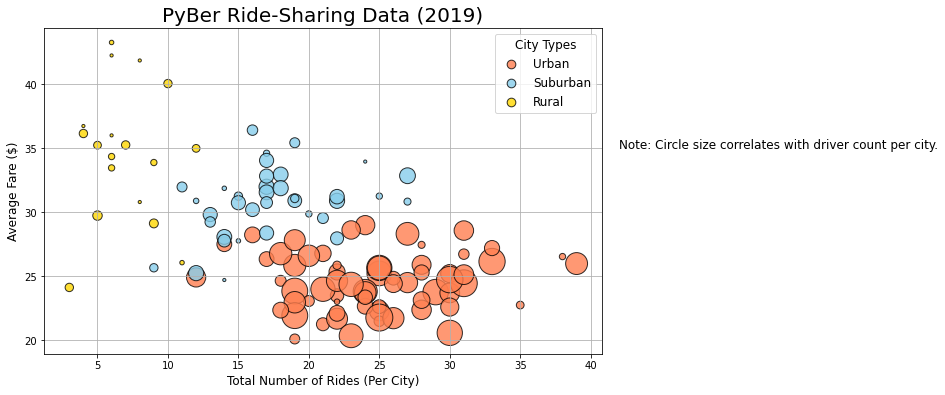

In [27]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_ride_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_ride_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_ride_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
#plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

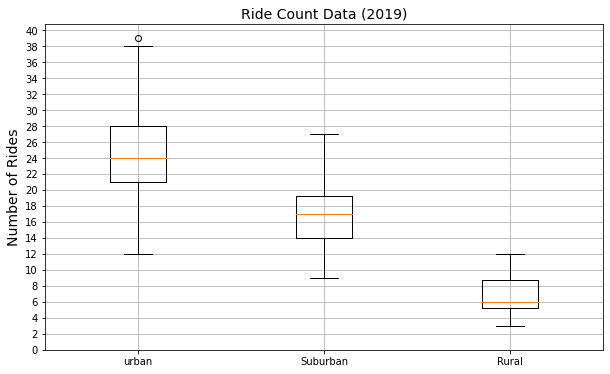

In [50]:
#create box-and-whisker plot for the cities ride count

#load all labes to be used
x_labels = ["urban", "Suburban", "Rural"]
#load datasets in alignment with labels above
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]


fig, ax= plt.subplots(figsize = (10,6))             #initiate graph
ax.boxplot(ride_count_data, labels=x_labels)        #type of graph w/ data to be displayed and variables
ax.set_title("Ride Count Data (2019)", fontsize=14) #set title of graph and set fontsize
ax.set_ylabel("Number of Rides", fontsize=14)       #set y label and fontsize
ax.set_yticks(np.arange(0,41,step=2))               #set range and frequency of ticks on y axis
ax.grid()                                           #add gridlines

plt.savefig('analysis/fig2.png')

plt.show                                            #show graph

In [44]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


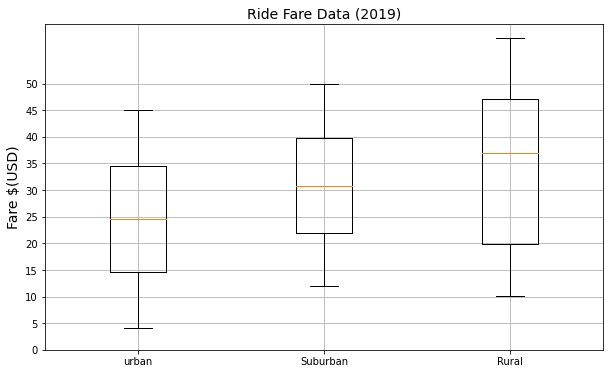

In [52]:
#create box-and-whisker plot for the cities type fares

#load all labes to be used
x_labels = ["urban", "Suburban", "Rural"]
#load datasets in alignment with labels above
ride_fare_data = [urban_fares, suburban_fares, rural_fares]


fig, ax= plt.subplots(figsize = (10,6))             #initiate graph
ax.boxplot(ride_fare_data, labels=x_labels)         #type of graph w/ data to be displayed and variables
ax.set_title("Ride Fare Data (2019)", fontsize=14)  #set title of graph and set fontsize
ax.set_ylabel("Fare $(USD)", fontsize=14)       #set y label and fontsize
ax.set_yticks(np.arange(0,51,step=5))               #set range and frequency of ticks on y axis
ax.grid()                                           #add gridlines

plt.savefig('analysis/fig3.png')

plt.show                                            #show graph

print("Summary Statistics")


Summary Statistics


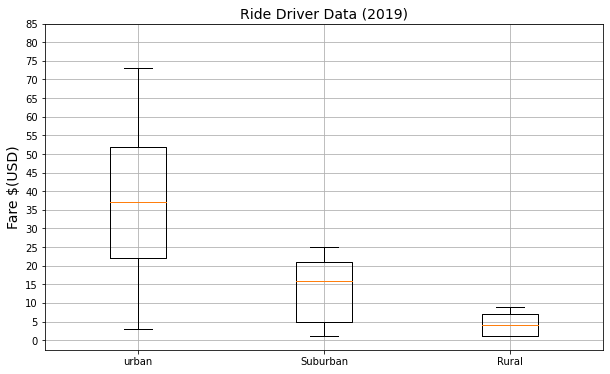

In [57]:
#create box-and-whisker plot for the cities ride count

#load all labes to be used
x_labels = ["urban", "Suburban", "Rural"]
#load datasets in alignment with labels above
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]


fig, ax= plt.subplots(figsize = (10,6))              #initiate graph
ax.boxplot(ride_driver_data, labels=x_labels)        #type of graph w/ data to be displayed and variables
ax.set_title("Ride Driver Data (2019)", fontsize=14) #set title of graph and set fontsize
ax.set_ylabel("Fare $(USD)", fontsize=14)            #set y label and fontsize
ax.set_yticks(np.arange(0,90,step=5))                #set range and frequency of ticks on y axis
ax.grid()                                            #add gridlines

#plt.savefig('analysis/fig4.png')

plt.show                                             #show graph

print("Summary Statistics")

In [64]:
city_type_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares = pyber_data_df["fare"].sum()
type_percents = city_type_fares / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

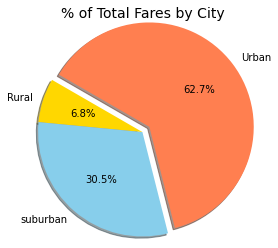

In [92]:
#create pie chart for fare % per city type

#create labels
labels = ["Rural", "suburban", "Urban"]
colors=["gold", "skyblue", "coral"]
explode = [0,0,.1]


fig, ax = plt.subplots()
ax.pie(type_percents,
       labels = ["Rural", "suburban", "Urban"],
       colors=["gold", "skyblue", "coral"], 
       explode = [0,0,.1],
       autopct = '%1.1f%%',
       shadow=True,
       startangle=150,
       radius=1.2
      )

ax.set_title("% of Total Fares by City", fontsize=14)

plt.show